# Assignment 4 - Convolutional Neural Network



In this assignment we will develop a neural network with fully-connected layers to perform classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import datasets
if sys.version_info >= (3, 0):
    def xrange(*args, **kwargs):
        return iter(range(*args, **kwargs))

In [2]:
#load dataset
def load_dataset():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    return X, y

def train_test_split(X, y):
    idx = np.arange(len(X))
    train_size = int(len(X) * 2/3)
    val_size = int(len(X) * 1/6)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test

We will use the following class `TwoLayerCNN` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation. You need to complete the functions.

In [25]:
class TwoLayerCNN(object):
    
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    N, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        #print(self.params['W1'])
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        #self.params['W1'] = np.zeros((input_size, hidden_size))
        #self.params['W2'] = np.zeros((hidden_size, output_size))

    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        #print('W1', W1)
        #print('W2', W2)
        N, D = X.shape

        # Compute the forward pass
        scores = None
        #############################################################################
        # Full Mark: 1                                                              #
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the scores variable, which should be an array of      #
        # shape (N, C).                                                             #
        #############################################################################
        
        # Using ReLUs as the Activation Function
        
        #print("X", X.shape, X) # (20, 4) = (N, D)
        #print("W1", W1.shape, W1) # (4, 8) = (D, H)
        #print("b1", b1.shape, b1) # (8, ) = (H, )
        Z1 = np.dot(X, W1) + b1
        #print("Z1", Z1.shape, Z1) # (20, 8) = (N, H)
        # Perform ReLU
        #X2 = np.maximum(0, Z1)
        X2 = np.where(Z1 > 0, Z1, Z1 * 0.01) # leaky Relu
        #print("X2", X2.shape, X2) # (20, 8) = (N, H)
        #print("W2", W2.shape, W2) # (8, 3) = (H, C)
        Z2 = np.dot(X2, W2) + b2
        #print("b2", b2.shape, b2) # (3, ) = (C, )
        # perform softmax?
        softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims = True)
        #scores = softmax(Z2)
        scores = Z2
        #scores = np.maximum(0, Z2)
        #print("Scores", scores.shape, scores) # (20, 3) = (N, C)
        
        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        # If the targets are not given then jump out, we're done
        if y is None:
            return scores

        # Compute the loss
        loss = None

        scores -= np.max(scores, axis=1, keepdims=True) # avoid numeric instability

        #############################################################################
        # Full Mark: 2                                                              #
        # TODO: Finish the forward pass, and compute the loss. This should include  #
        # both the data loss and L2 regularization for W1 and W2. Store the result  #
        # in the variable loss, which should be a scalar. Use the Softmax           #
        # classifier loss.                                                          #
        #############################################################################

        probs = softmax(scores)
        data_loss = np.mean(-np.log(probs[range(N), y] + 1e-10)) # data loss, added 1e-6 so no log 0
        #print(data_loss)
        loss = data_loss + reg * (np.sum(W2 ** 2) + np.sum(W1 ** 2)) # regularization too
        #print(loss)
        
        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        # Backward pass: compute gradients
        grads = {}
        #############################################################################
        # Full Mark: 2                                                              #
        # TODO: Compute the backward pass, computing the derivatives of the weights #
        # and biases. Store the results in the grads dictionary. For example,       #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size #
        #############################################################################
        
        # softmax
        dscores = probs
        dscores[range(N), y] -= 1
        dscores /= N
        #print('dscores', dscores.shape, dscores)

        # W2 gradient
        dW2 = np.dot(X2.T, dscores)
        #print('W2', W2.shape, dW2.shape)

        # b2 gradient
        db2 = np.sum(dscores, axis = 0)
        #print('b2', b2.shape, db2.shape)

        # W1 gradient
        dW1 = np.dot(dscores, W2.T)
        # relu
        dZ1 = np.ones(Z1.shape)
        dZ1[Z1 < 0] = 0
        dW1 = np.dot(X.T, dZ1)
        #print('W1', W1.shape, dW1.shape)

        # b1 gradient
        db1 = np.sum(dZ1, axis = 0)
        #print('b1', b1.shape, db1.shape)

        # regularization gradient
        dW1 += reg * 2 * W1
        #print('W1', W1, '\n', dW1)
        dW2 += reg * 2 * W2
        #print('W2', W2, '\n', dW2)

        # store the results in the grads dictionary
        grads = {'W1':dW1, 'b1':db1, 'W2':dW2, 'b2':db2}
        
        #############################################################################
        #                              END OF YOUR CODE                             #
        #############################################################################

        return loss, grads

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=5e-6, num_iters=100,
            batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in xrange(num_iters):

          #########################################################################
          # Full Mark: 0.5                                                        #
          # TODO: Create a random minibatch of training data and labels using     #
          # given num_train and batch_size, storing them in X_batch and y_batch   #
          # respectively.                                                         #
          #########################################################################

            idx = np.random.choice(num_train, batch_size)
            #print(idx.size, idx)
            X_batch = X[idx]
            y_batch = y[idx]

          #########################################################################
          #                             END OF YOUR CODE                          #
          #########################################################################

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y = y_batch, reg = reg)
            loss_history.append(loss)
            #print(loss)
            #print(grads['W1'].mean())

          #########################################################################
          # Full Mark: 0.5                                                        #
          # TODO: Use the gradients in the grads dictionary to update the         #
          # parameters of the network (stored in the dictionary self.params)      #
          # using stochastic gradient descent. You'll need to use the gradients   #
          # stored in the grads dictionary defined above.                         #
          #########################################################################

            self.params['W1'] = self.params['W1'] - (learning_rate * grads['W1'])
            self.params['W2'] = self.params['W2'] - (learning_rate * grads['W2'])
            self.params['b1'] = self.params['b1'] - (learning_rate * grads['b1'])
            self.params['b2'] = self.params['b2'] - (learning_rate * grads['b2'])
            
            #print('W1', (learning_rate * grads['W1']).mean())
            #print('b1', (learning_rate * grads['b1']).mean())
            #print('W2', (learning_rate * grads['W2']).mean())
            #print('b2', (learning_rate * grads['b2']).mean())

          #########################################################################
          #                             END OF YOUR CODE                          #
          #########################################################################

            if verbose and it % 10 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """

        ###########################################################################
        # Full Mark: 1                                                            #
        # TODO: Implement this function                                           #
        ###########################################################################
        
        '''
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        Z1 = np.dot(X, W1) + b1
        X2 = np.maximum(0, Z1)
        Z2 = np.dot(X2, W2) + b2
        scores = Z2
        y_pred1 = np.argmax(scores, axis = 1)
        '''
        
        scores = self.loss(X) # returns just the score cuz no y
        y_pred = np.argmax(scores, axis = 1)
        #print(y_pred == y_pred1)
        #print(y_pred)

        ###########################################################################
        #                              END OF YOUR CODE                           #
        ###########################################################################

        return y_pred

In [26]:
# To check your implementations.
X,y =load_dataset()
X_train, y_train, X_val, y_val, X_test, y_test=train_test_split(X, y)

###########################################################################
# Full Mark: 1                                                            #
# TODO: 1. Using TwoLayerCNN to train on given datasets                   #
#       2. Print out the final loss                                       #
#       3. Print out the test accuracy                                    #
###########################################################################

#print(X_train.shape) # (100, 4)
#print(y_train.shape) # (100, ) -> 3 classes
#print(X_val.shape) # (25, 4)
#print(y_val.shape) # (25, )
#print(X_test.shape) # (25, 4)
#print(y_test.shape) # (25, )

input_size = 4
hidden_size = 5
num_classes = 3
net = TwoLayerCNN(input_size, hidden_size, num_classes, std = 1e-4)
# TODO
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters = 1000, batch_size = 20, learning_rate = 1e-3, learning_rate_decay = 0.95,
            reg = 5e-6, verbose = False)

print('Final Loss:', stats['loss_history'][-1])
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

###########################################################################
#                              END OF YOUR CODE                           #
###########################################################################


Final Loss: 1.0990233688186806
Test accuracy:  0.24


The loss function and the accuracies on the training and validation sets would give more insight views.

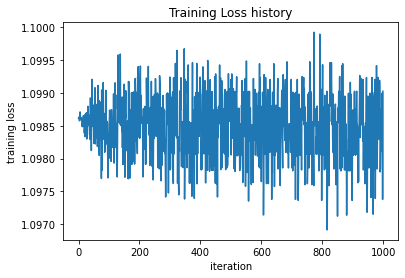

In [27]:
###########################################################################
# Full Mark: 0.5                                                          #
# TODO: Plot training loss history                                        # 
###########################################################################

plt.plot(stats['loss_history'])

###########################################################################
#                              END OF YOUR CODE                           #
###########################################################################   
    
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()


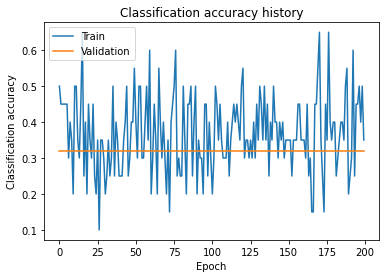

In [28]:
###########################################################################
# Full Mark: 0.5                                                          #
# TODO: Plot Classification accuracy history, compare train/val accuracy  #
###########################################################################

plt.plot(stats['train_acc_history'], label = 'Train')
plt.plot(stats['val_acc_history'], label = 'Validation')

###########################################################################
#                              END OF YOUR CODE                           #
###########################################################################  

plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.title('Classification accuracy history')
plt.legend()
plt.show()

Final Loss: 0.1645125217025028
Test accuracy:  0.96


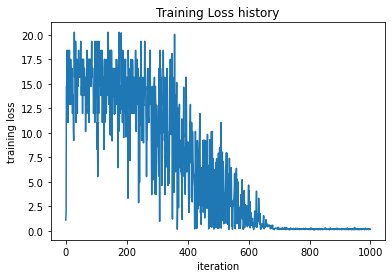

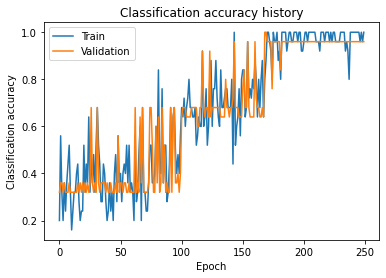

In [29]:
###############################################################################
# Full Mark: 1                                                                #
# TODO: Describe or using codes to show how you tune your hyperparameters     #
# (hidden layer size, learning rate, numer of training epochs, regularization #
# strength and so on). Is your result good? Does it look underfiting?         #
# Overfiting?                                                                 #
###############################################################################

# changed ReLU to leaky ReLU due to dying ReLU problem
# increased learning rate, learning rate decay, iterations, hidden_size, regularization
# batch_size 25, stdev 1e-2

input_size = 4
num_classes = 3

# tuned parameters
lr = 1
lrd = 0.97
r = 5e-8
bs = 25
itr = 1000
stdev = 1e-2
hidden_size = 12

net = TwoLayerCNN(input_size, hidden_size, num_classes, std = stdev)
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters = itr, batch_size = bs, learning_rate = lr, learning_rate_decay = lrd,
            reg = r, verbose = False)
    
print('Final Loss:', stats['loss_history'][-1])
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

plt.plot(stats['train_acc_history'], label = 'Train')
plt.plot(stats['val_acc_history'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.title('Classification accuracy history')
plt.legend()
plt.show()

###############################################################################
#                              END OF YOUR CODE                               #
###############################################################################  

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$ 
At first, the model was predicting the same thing for every sample and resulted in barely any changes to second weight layer. I tried changing the parameters, weight initilization but it remains the same, so the ReLU was the problem, specifically dying ReLU. The ReLU causes neurons to become inactive and only output 0. Towards the end of training, all the ReLU output was 0. The solution was to implement a leaky ReLU instead. I changed `np.maximum(0, Z1)` to `np.where(Z1 > 0, Z1, Z1 * 0.01)`. This drastically improved the model and now the loss graph looks more proper now and overall getting smaller, but it still is noisy. In terms of parameters, I increased the learning rate a lot due to resulting in higher accuracies when doing so. With low learning rate, the noisy loss graph didn't decrease. I also increased hidden size and decreased regularization which made the accuracy higher. I also increased iterations and batch size. The hyperparameter tuning process resulted in running lots of models with different parameters, looking at the validation accuracy and the graphs and changing the parameters to get a better loss and validation accuracy. Running the model with my tuned parameters 1000 times results in an average validation accuracy of 0.926.

The results are good in terms of test and validation accuracy, however there is still lots of noise (accuracy and loss going up and down, as shown in the graphs).

### Testing/Tuning

In [18]:
# averaging 

total = 0
lim = 1000

# parameters
lr = 1
lrd = 0.97
r = 5e-8
bs = 25
itr = 1000
stdev = 1e-2
hidden_size = 12

for i in range(lim):
    input_size = 4
    num_classes = 3
    net = TwoLayerCNN(input_size, hidden_size, num_classes, std = stdev)
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters = itr, batch_size = bs, learning_rate = lr, learning_rate_decay = lrd,
                reg = r, verbose = False)
    total += stats['val_acc_history'][-1]
print("Average Val Accuracy:", total / lim)

Average Val Accuracy: 0.9261200000000065


In [ ]:
# tuned based on validation and graph

lr = 1
lrd = 0.95
r = 5e-6
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.84

lr = 0.01
lrd = 0.95
r = 5e-6
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.363

lr = 0.1 
lrd = 0.95
r = 5e-6
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.369

lr = 1 
lrd = 0.90 
r = 5e-6
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.81

lr = 1 
lrd = 0.8 
r = 5e-6
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.73

lr = 1 
lrd = 0.97 
r = 5e-6 
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.83

lr = 1 
lrd = 0.97 
r = 5e-4 
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.819

lr = 1 
lrd = 0.97 
r = 5e-6
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.83

lr = 1
lrd = 0.97
r = 5e-2
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.34

lr = 1 
lrd = 0.97 
r = 5e-4 
bs = 50 
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.84

lr = 1
lrd = 0.97
r = 5e-4
bs = 20
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.82

lr = 1 
lrd = 0.97 
r = 5e-4 
bs = 25 
itr = 100 
stdev = 1e-4
hidden_size = 12
# 0.34

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 500
stdev = 1e-4
hidden_size = 12
# 0.57

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 1000
stdev = 1e-4
hidden_size = 12
# 0.84

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 5000
stdev = 1e-4
hidden_size = 12
# 0.83

lr = 1 
lrd = 0.97 
r = 5e-4 
bs = 25 
itr = 1000 
stdev = 1e-4 
hidden_size = 12
# 0.89

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 1000
stdev = 1e-6
hidden_size = 12
# 0.864

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 1000
stdev = 1e-2
hidden_size = 12
# 0.84

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 1000
stdev = 1e-2
hidden_size = 2
# 0.6

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 1000
stdev = 1e-2
hidden_size = 4
# 0.73

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 1000
stdev = 1e-2
hidden_size = 8
# 0.8

lr = 1
lrd = 0.97
r = 5e-4
bs = 25
itr = 1000
stdev = 1e-2
hidden_size = 12
# 0.8616

